In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df=pd.read_csv(r"C:\Users\victo\OneDrive\Documents\GSU\DMLab\FFT\M1.csv", sep="\t")
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})


In [23]:
#var: time is the time component of the data vector in the time space

dt = 12
time = np.arange(10, 720, dt)

subdata = df[['TOTUSJH']].copy()
subdata['time'] = time.tolist()
subdata.head()

,TOTUSJH,time
0,980.993502,10
1,987.271725,22
2,985.015683,34
3,993.944093,46
4,994.364606,58


In [47]:
n = len(time) #no of discrete data points

Text(0, 0.5, 'TOTUSJH')

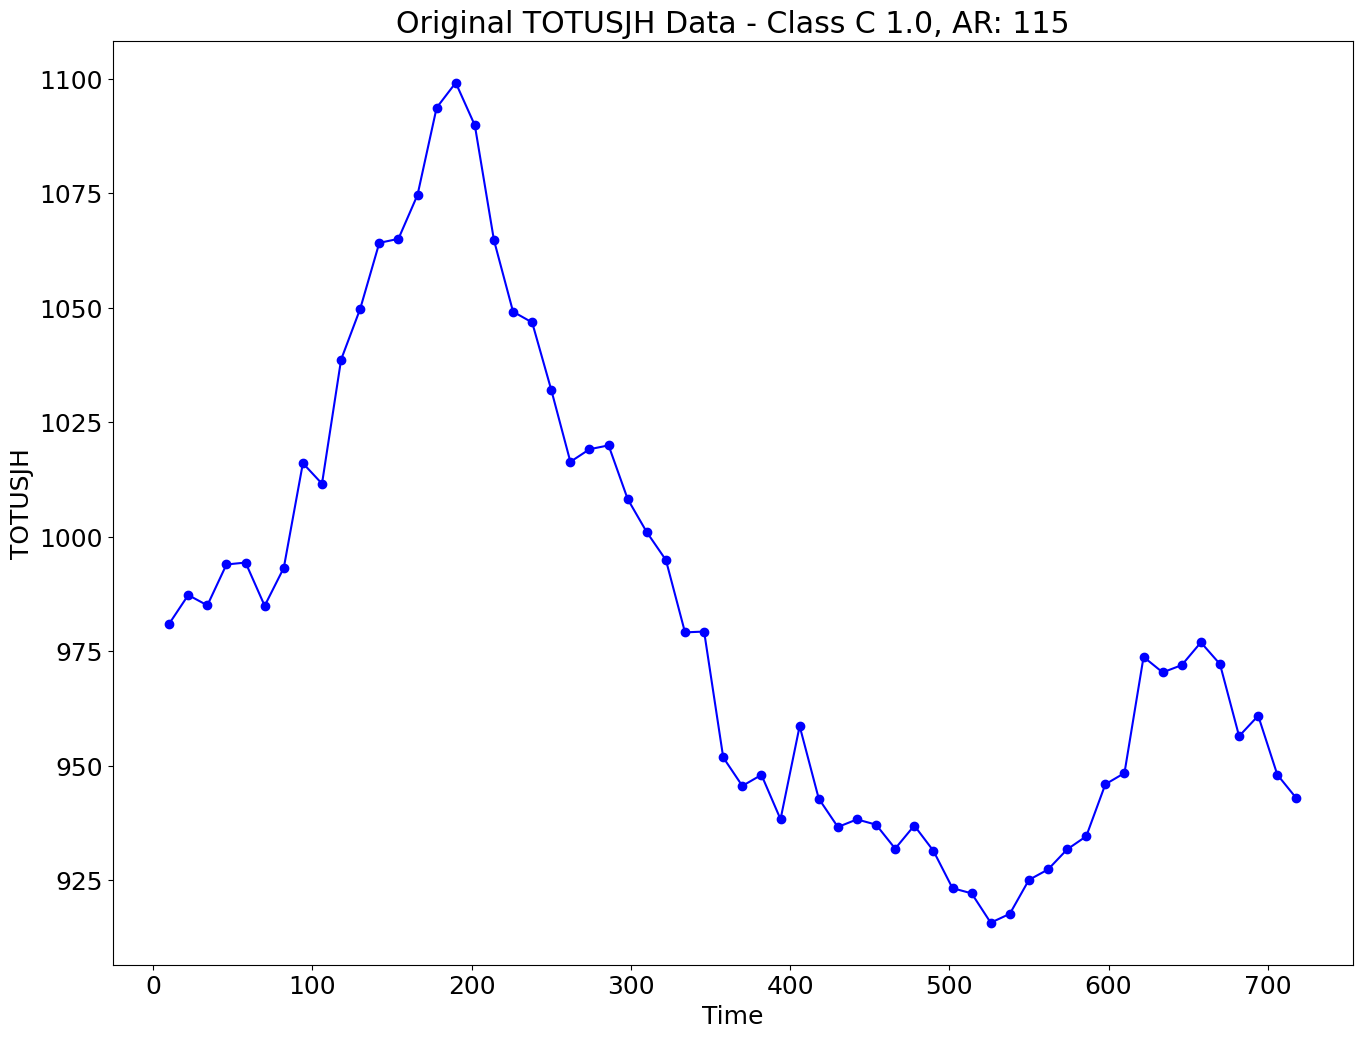

In [49]:
# Plot the original TOTUSJH data in time domain
plt.plot(time, subdata['TOTUSJH'],marker='o', linestyle='-', color='b')
plt.title('Original TOTUSJH Data - Class M 1.0, AR: 115')
plt.xlabel('Time')
plt.ylabel('TOTUSJH')

array([ 5.89961092e+04+0.00000000e+00j,  2.72502528e+02-1.89723979e+03j,
       -5.88139734e+02+1.95153024e+02j, -1.31037243e+02+3.86696006e+02j,
       -2.94082566e+01+4.65637105e+01j,  8.96421845e+01-2.59901283e+02j,
       -9.90913497e+01-1.35159260e+02j,  6.08911883e+01-3.42464002e+01j,
        3.59493438e+01-1.23430628e+02j,  3.10873545e+01-6.94484129e+01j,
       -8.11843435e+01-8.86336719e+00j,  1.86545571e+01-2.08603421e+01j,
        2.70010106e+01-1.55017293e+01j,  4.64880039e+01-6.67535209e+01j,
       -4.65616858e+01-3.94896193e+00j,  2.05122455e+01+3.46235762e+01j,
        4.78079794e+01-5.67373111e+00j,  7.75301454e+00-4.05566647e+01j,
        4.38532822e+01-2.60515358e+01j,  3.38790612e+01-6.48334570e+01j,
        4.71039859e+01-8.23105448e+01j,  3.64008696e+01+2.41068412e+01j,
        1.60177599e+01-5.49688998e+01j,  1.29409554e-01+3.92245001e+01j,
       -7.04426194e+00-9.22929158e+00j,  1.02242022e+01+4.49468799e+01j,
        4.45300067e+01-3.46777651e+01j,  4.66385637

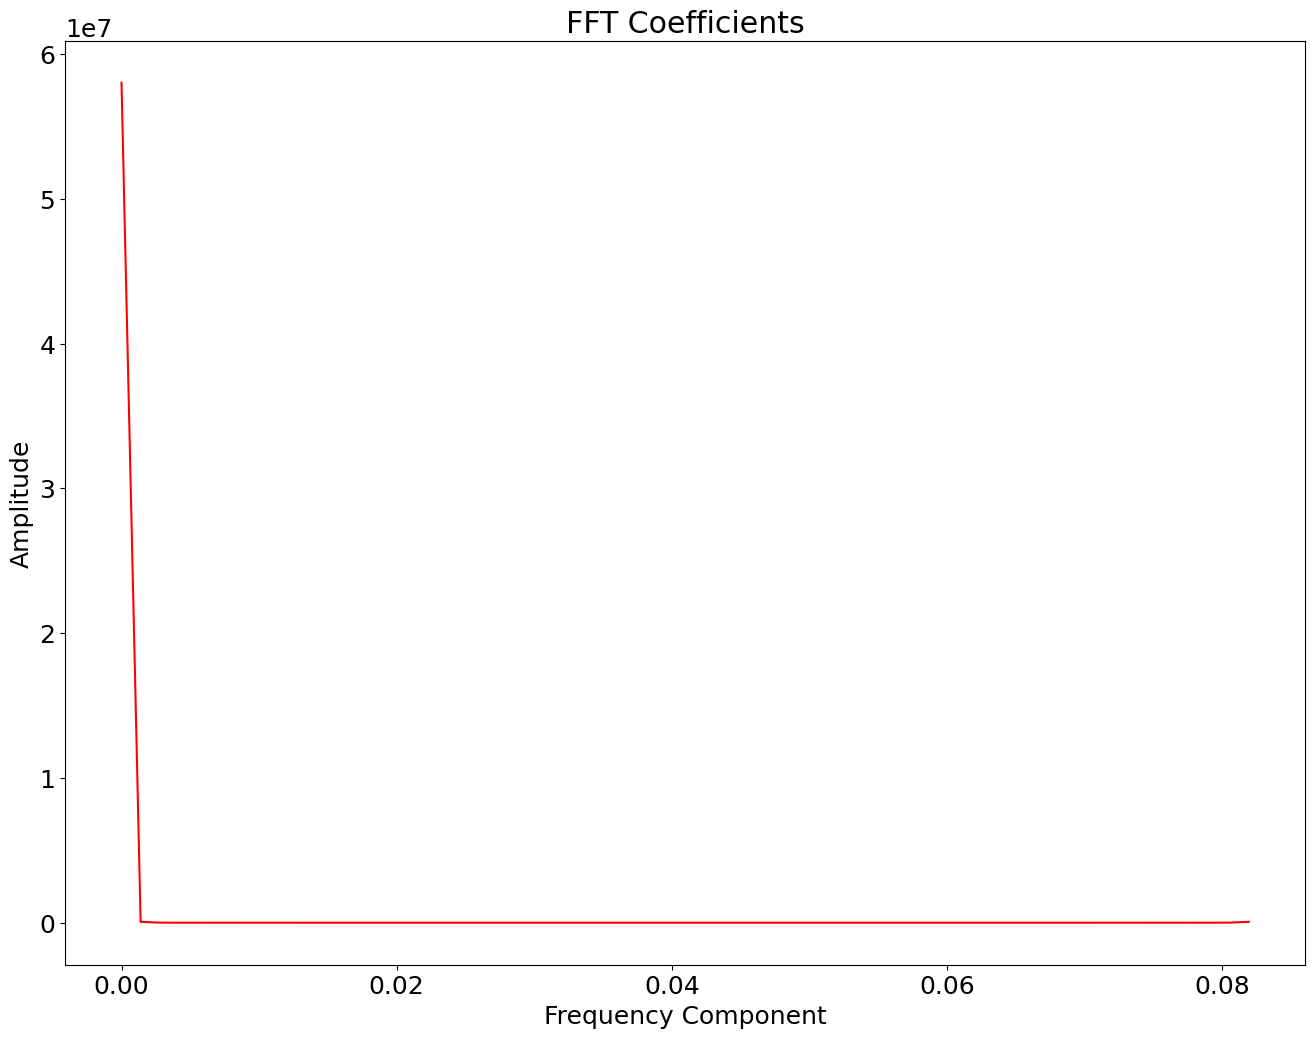

In [78]:
#plot FFT for the sampleM

fhat = np.fft.fft(subdata['TOTUSJH'],n) #compute the FFT
PSD = fhat*np.conj(fhat)/n #powwer spectrum density per frequency
freq = (1/(dt*n)) * np.arange(n) #create x-axis of frequencies

plt.plot(freq,PSD, color='r')
plt.title('FFT Coefficients')
plt.xlabel('Frequency Component')
plt.ylabel('Amplitude')

fhat

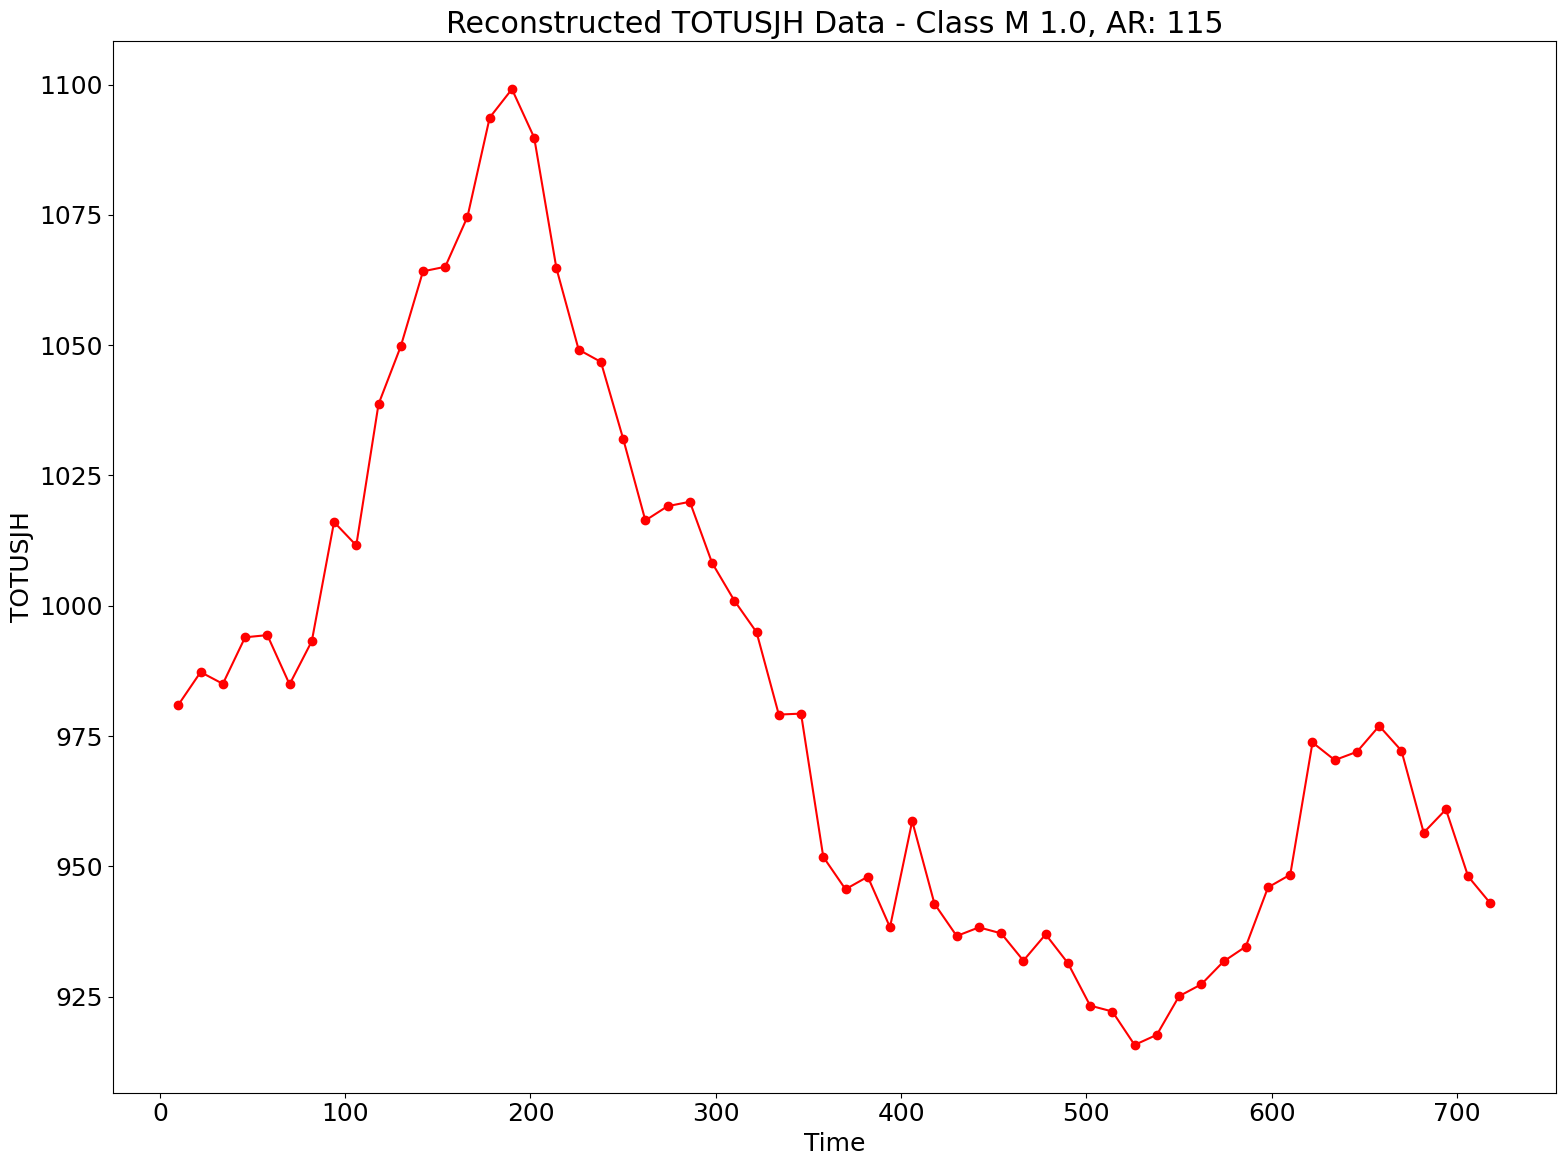

In [69]:
# Plot the reconstructed age data after IFFT

ifft_result = np.fft.ifft(fhat)
plt.plot(time, ifft_result, marker='o', linestyle='-', color='r')
plt.title('Reconstructed TOTUSJH Data - Class M 1.0, AR: 115')
plt.xlabel('Time')
plt.ylabel('TOTUSJH')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


In [70]:
df1=pd.read_csv(r"C:\Users\victo\OneDrive\Documents\GSU\DMLab\FFT\C9.csv", sep="\t")

In [72]:

subdata1 = df1[['TOTUSJH']].copy()
subdata1['time'] = time.tolist()
subdata1.head()

,TOTUSJH,time
0,3301.362471,10
1,3344.495095,22
2,3377.004977,34
3,3356.425261,46
4,3398.838092,58


Text(0, 0.5, 'TOTUSJH')

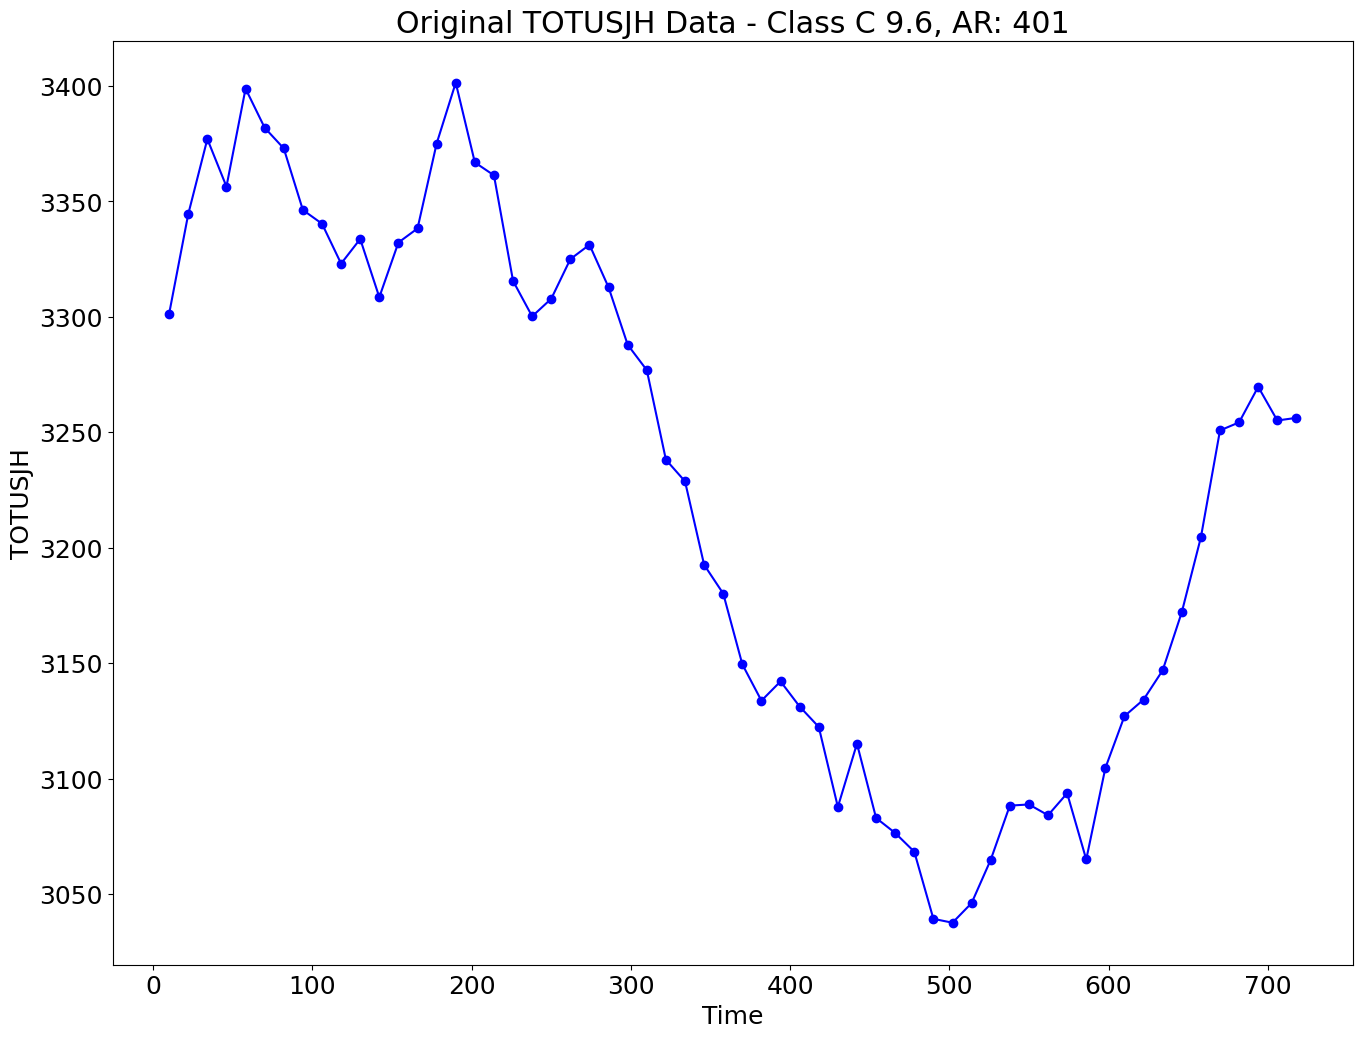

In [73]:
# Plot the original TOTUSJH data in time domain
plt.plot(time, subdata1['TOTUSJH'],marker='o', linestyle='-', color='b')
plt.title('Original TOTUSJH Data - Class C 9.6, AR: 401')
plt.xlabel('Time')
plt.ylabel('TOTUSJH')




Text(0, 0.5, 'Amplitude')

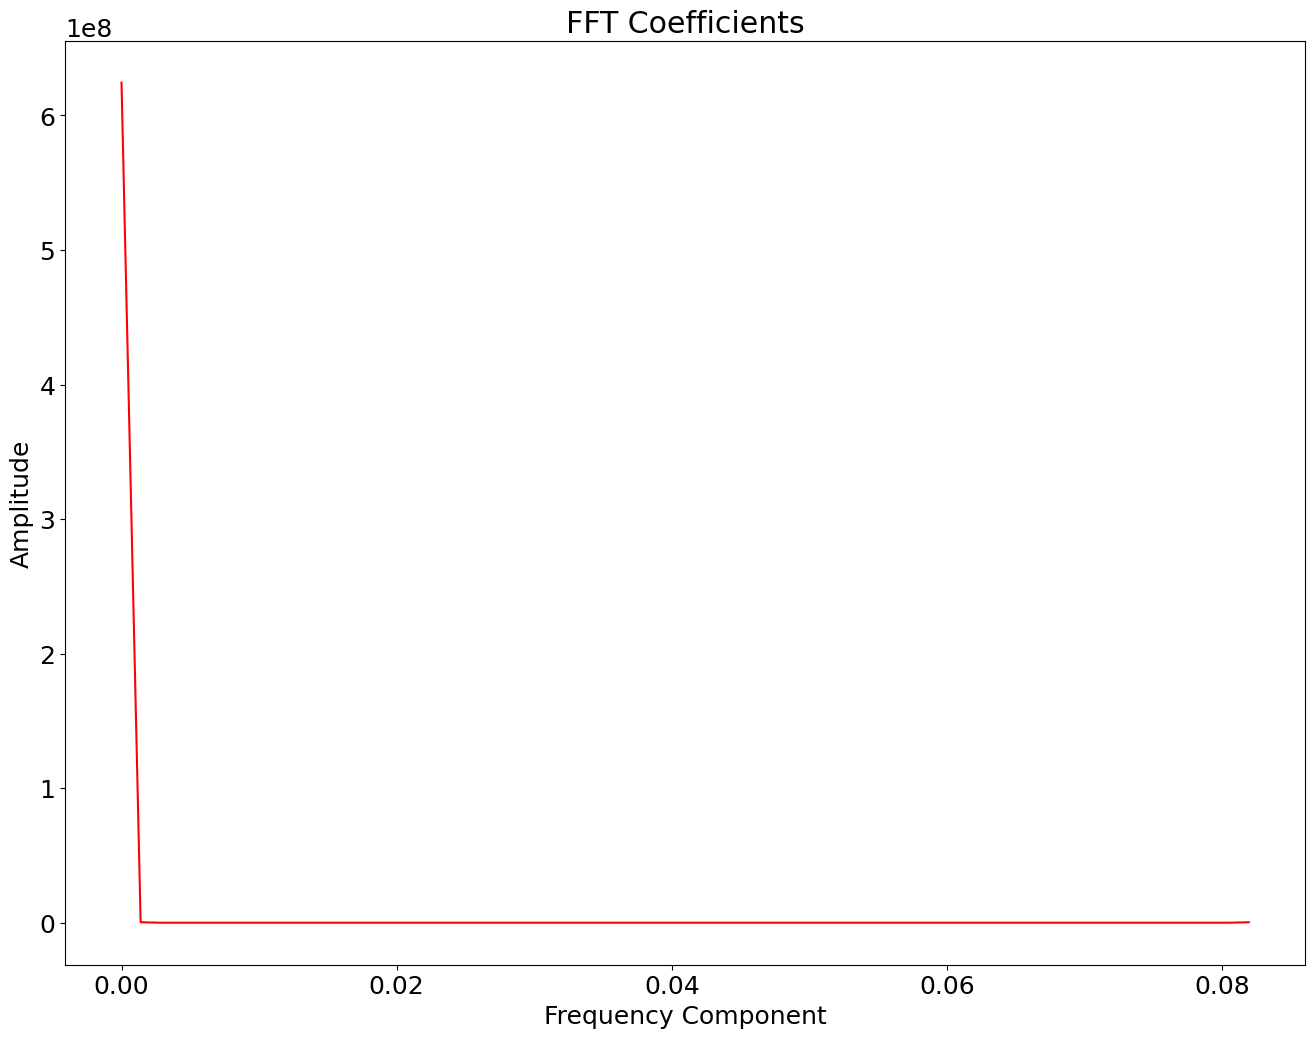

In [75]:
#plot FFT for the sampleC

fhat1 = np.fft.fft(subdata1['TOTUSJH'],n) #compute the FFT
PSD1 = fhat1*np.conj(fhat1)/n #powwer spectrum density per frequency
freq1 = (1/(dt*n)) * np.arange(n) #create x-axis of frequencies

plt.plot(freq1,PSD1, color='r')
plt.title('FFT Coefficients')
plt.xlabel('Frequency Component')
plt.ylabel('Amplitude')



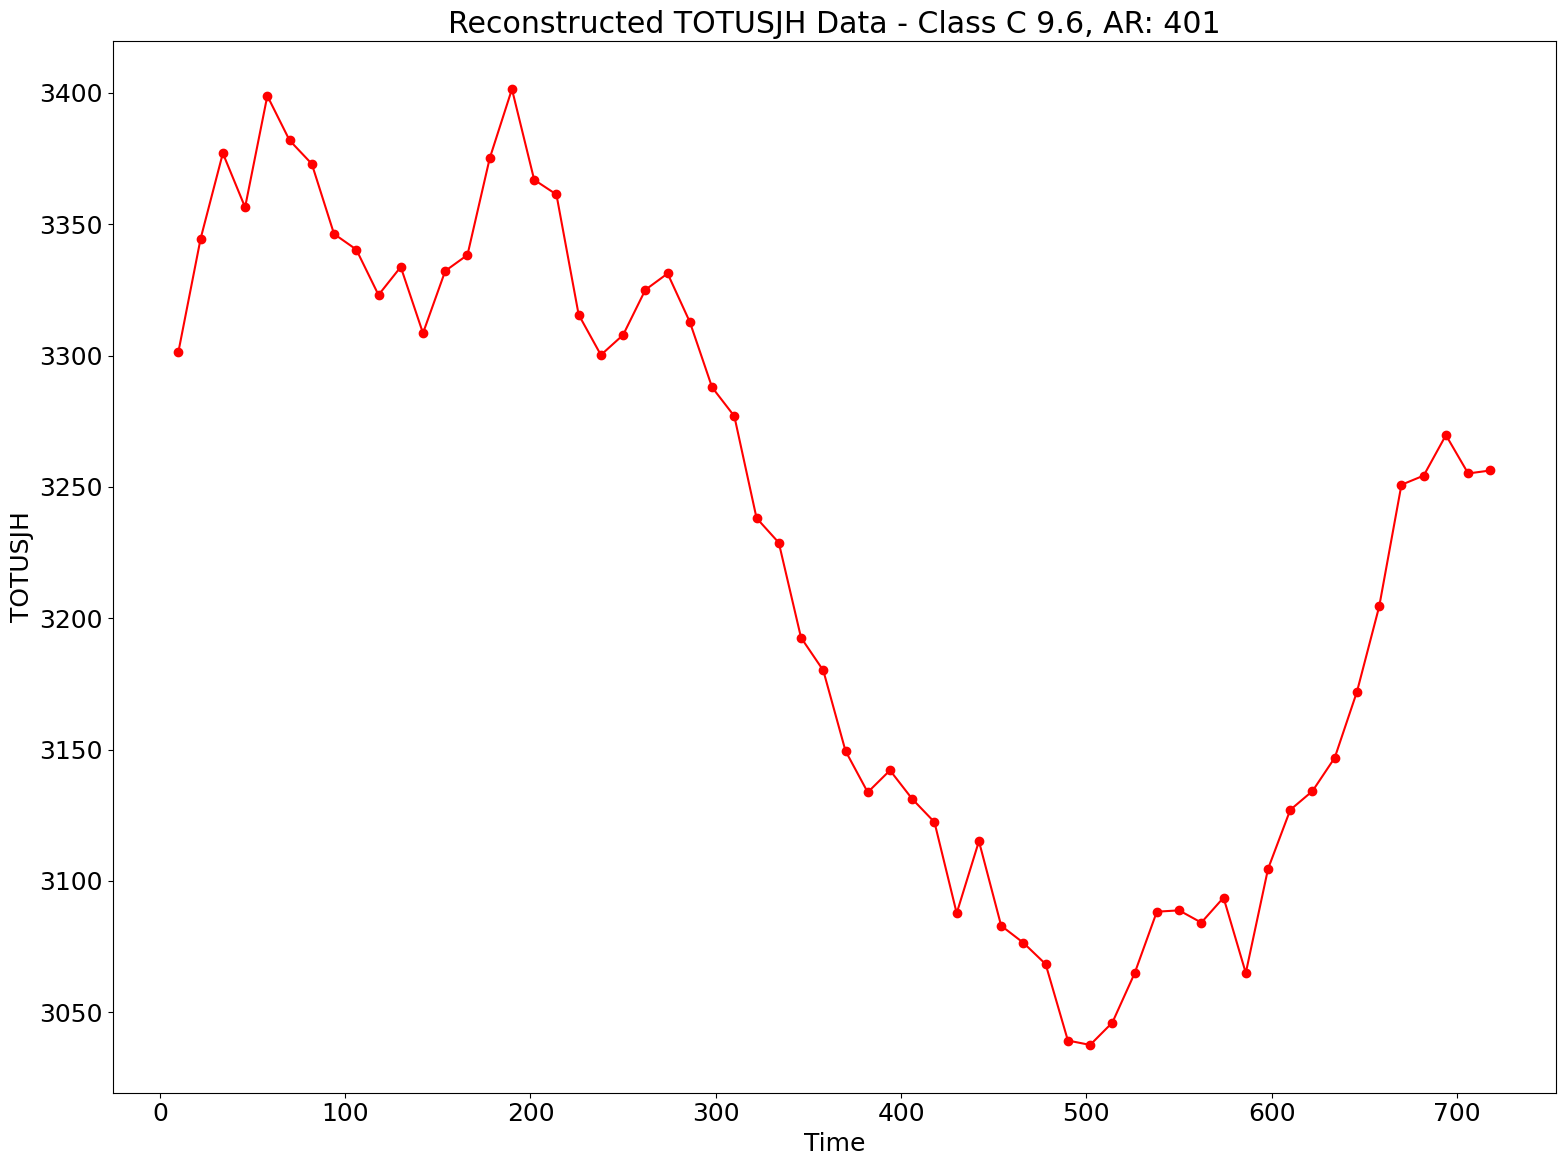

In [77]:
# Plot the reconstructed TOTUSJH data after IFFT

ifft_result1 = np.fft.ifft(fhat1)
plt.plot(time, ifft_result1, marker='o', linestyle='-', color='r')
plt.title('Reconstructed TOTUSJH Data - Class C 9.6, AR: 401')
plt.xlabel('Time')
plt.ylabel('TOTUSJH')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
#next we go ahead to remove certain frequency coefficients-fhat that we seem as irrelevant and then 
#perform an inverse FFT to get the denoised data i.e to getting frequencies

indices = PSD >0.05    #find all frequencies with large power
PSDclean = PSD * indices  #zero out others
fhatfiltered = indices * fhat    #zero out small fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) #inverse FFT for filtered time signal

